In [1]:
# TENSORFLOW
import tensorflow as tf
import numpy as np

In [2]:
a=tf.constant(15)
b=tf.constant(20)
print(a*b)

tf.Tensor(300, shape=(), dtype=int32)


In [3]:
x=np.random.rand(100).astype(np.float32)
print(x)

[0.6255894  0.76211894 0.4923908  0.5984841  0.43553367 0.86361814
 0.5258384  0.37507215 0.2786291  0.7880572  0.6691819  0.6044925
 0.39970753 0.9344519  0.6262323  0.34627104 0.90268314 0.6361491
 0.6846697  0.6586219  0.18961722 0.98863024 0.33329657 0.5982643
 0.50581175 0.8394036  0.08170426 0.915101   0.49758214 0.42208257
 0.42355785 0.04261615 0.46261802 0.9285579  0.4797071  0.6023995
 0.07636965 0.16722144 0.3908249  0.20535909 0.6936247  0.37095916
 0.10640281 0.42078808 0.15860353 0.15050113 0.39302424 0.40298757
 0.4360927  0.8152559  0.9742102  0.28507593 0.14162315 0.11221021
 0.44589218 0.09234221 0.95445955 0.45937943 0.5288144  0.60429144
 0.48132417 0.1873742  0.7929383  0.7896797  0.12404459 0.39618376
 0.49186137 0.5406069  0.00939533 0.63355    0.1452465  0.8707016
 0.7951499  0.62605727 0.18518063 0.73761857 0.8757402  0.31258026
 0.99742395 0.33613566 0.507949   0.5657874  0.41976994 0.89915437
 0.4265355  0.41291788 0.28061143 0.99488556 0.71508205 0.392934
 0

In [4]:
y=0.2*x+0.2

In [5]:
W=tf.Variable(tf.random.normal([1]))

In [6]:
b=tf.Variable(tf.zeros([1]))

In [7]:
def mse_loss():
    y_pred=W*x+b
    loss=tf.reduce_mean(tf.square(y_pred-y))
    return loss

In [8]:
optimizer=tf.optimizers.Adam()

In [12]:
for step in range(5000):
    with tf.GradientTape() as tape:
        loss = mse_loss()  # Call your loss function here

    # Compute gradients of loss with respect to variables [W, b]
    gradients = tape.gradient(loss, [W, b])

    # Apply gradients to update W and b
    optimizer.apply_gradients(zip(gradients, [W, b]))

    # Print the progress every 500 steps
    if step % 500 == 0:
        print(step, W.numpy(), b.numpy())

0 [2.0605392] [-0.00099999]
500 [1.6612548] [-0.36247945]
1000 [1.4352438] [-0.43183473]
1500 [1.257383] [-0.3602431]
2000 [1.0690656] [-0.2605003]
2500 [0.8748727] [-0.15704107]
3000 [0.68904734] [-0.0583755]
3500 [0.52493] [0.0285081]
4000 [0.39306283] [0.09817103]
4500 [0.29914072] [0.14772618]


In [93]:
# KERAS

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [94]:
data = pd.read_csv("C:\\Users\\anura\\Downloads\\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
x = data.drop('Outcome',axis=1).values
y = data['Outcome'].values

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [97]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [98]:
model = Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.summary()

C:\Users\anura\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [100]:
history = model.fit(
    x_train,
    y_train,
    
    epochs = 50,
    batch_size = 16,
    validation_split = 0.2
)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4990 - loss: 0.7185 - val_accuracy: 0.6585 - val_loss: 0.6120
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7306 - loss: 0.5751 - val_accuracy: 0.7073 - val_loss: 0.5397
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7111 - loss: 0.5400 - val_accuracy: 0.7398 - val_loss: 0.5093
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.4494 - val_accuracy: 0.7480 - val_loss: 0.4953
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7871 - loss: 0.4713 - val_accuracy: 0.7724 - val_loss: 0.4935
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4328 - val_accuracy: 0.7886 - val_loss: 0.4918
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7962 - loss: 0.4450 - val_accuracy: 0.7805 - val_loss: 0.4851
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7990 - loss: 0.4266 - val_accuracy: 0.7724 - val_loss:

In [101]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: ",test_loss)
print("Test Accuracy: ",test_acc)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7029 - loss: 0.5472
Test Loss:  0.5978493094444275
Test Accuracy:  0.7077922224998474


In [102]:
print("First 5 Predictions:\n")
predictions = model.predict(x_test)
n = 5
for i in range(n):
    if (predictions[i] > 0.5):
        prediction = 'Diabetic'
    else:
        prediction = 'Non-Diabetic'
    print(f"Prediction {i+1}: {prediction}\n")

First 5 Predictions:

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000010FDB7F20C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Prediction 1: Diabetic

Prediction 2: Diabetic

Prediction 3: Diabetic

Prediction 4: Non-Diabetic

Prediction 5: Diabetic



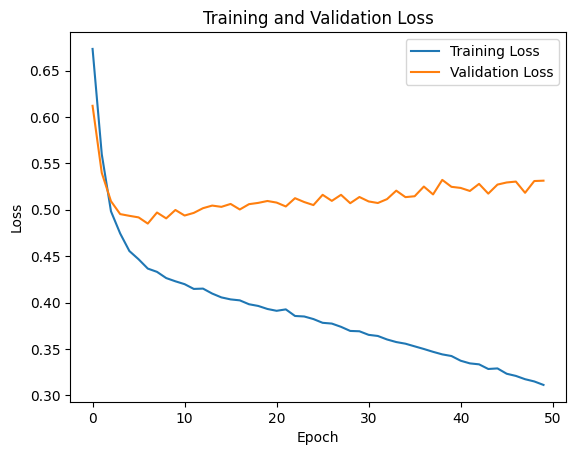

In [103]:
# plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

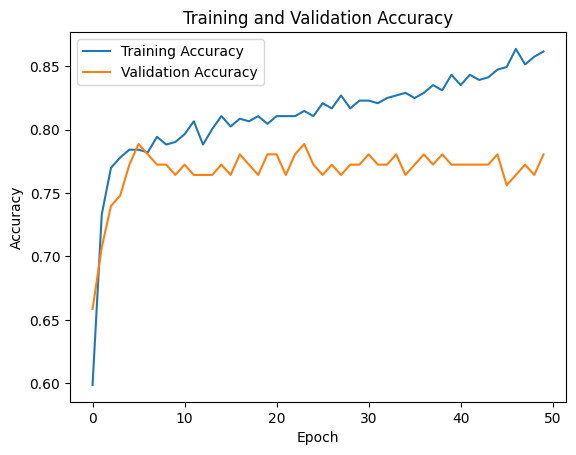

In [104]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()